Network Science FSS 2025

# Home Assignment 1

Submit your solution via ILIAS by **23.59 on Monday, 10th of March**.

Submit your solutions in teams of 3-4 students. Unless explicitly agreed otherwise in advance, **submissions from teams with more or less members will NOT be graded**.
Make sure that all members of your team are added to the team on ILIAS using their ILIAS account handles. As names are not unique, if the system indicates there is "no access", then the wrong person has been added. Submit one notebook per team, do not submit the dataset(s) you used. Also, do NOT compress/zip your submission!

You may use the code from the exercises and basic functionalities that are explained in official documentation of Python packages without citing, __all other sources must be cited__. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members may be expelled from the course without warning.

#### General guidelines:
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points.
* If you use packages that are not available on the default or conda-forge channel, list them below. Also add a link to installation instructions. 
* Ensure that the notebook does not rely on the current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory.
* Make sure you clean up your code before submission, e.g., properly align your code, and delete every line of code that you do not need anymore, even if you may have experimented with it. Minimize usage of global variables. Avoid reusing variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Feel free to use comments in the code. While we do not require them to get full marks, they may help us in case your code has minor errors.
* For questions that require a textual answer, please do not write the answer as a comment in a code cell, but in a Markdown cell below the code. Always remember to provide sufficient justification for all answers.
* You may create as many additional cells as you want, just make sure that the solutions to the individual tasks can be found near the corresponding assignment.
* If you have any general question regarding the understanding of a task, do not hesitate to post in the student forum in ILIAS, so we can clear up such questions for all students in the course.

Additional packages:
 - `pandas`, https://pandas.pydata.org/docs/getting_started/install.html
 - `seaborn`, https://seaborn.pydata.org/installing.html 

### The Train Bombing Network

For most of this home assignment, you will be working on the train bombing network. This is provided in an edgelist format in the file _train.edgelist_.

This undirected network contains contacts between suspected terrorists involved in the train bombing of Madrid on the 11th of March 2004, as reconstructed from newspapers. A node represents a terrorist and an edge between two terrorists shows that there was contact between the two terrorists. The edge weights denote how 'strong' a connection was. This includes friendship and co-participation in training camps or previous attacks. In the following, we will denote this network as $G$.

<span style="color:orange">__Load edge weights, but ignore them for the calculations in Task 1 and 2__</span>

__References:__  
1) Dataset in the KONECT network repsitory: http://konect.cc/networks/moreno_train/
2) Brian Hayes. Connecting the dots. can the tools of graph theory and social-network studies unravel the next big plot? American Scientist, 94(5):400--404, 2006.

In [6]:
# We used pandas and seaborn if you need install them run this cell if you have pip as is faster otherwise follow the documentation above

!pip install pandas
!pip install seaborn

In [3]:
# We used pandas and seaborn if you need install them run this cell if you are using conda as is faster otherwise follow the documentation above

!conda install -c conda-forge pandas seaborn -y

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [4]:
# imports
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from typing import List, Optional, Tuple, Dict

import matplotlib.pyplot as plt
from collections import Counter

### Task 1:  Basic Network Properties (8 pts)

__a)__ Read in the data file and store the network as variable `G`. Store the number of nodes and edges of `G` into variables `n_nodes` and `n_edges` respectively. **(2 pts)**


In [5]:
#First, we read the data file and store the network as variable G

G = nx.read_edgelist('train.edgelist', nodetype=int, data=[('weight', float)], comments='%')
'''
The strucutre to be able to read the file is that:
    - comments='%' ignores lines starting with % because our file contains comment lines
    - data=[('weight', float)] ensures that edge weights are stored as floating-point numbers
    
'''

#Then, we store the number of nodes and edges of G into the next variables
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

#and we print
print(f'Number of nodes: {n_nodes}')
print(f'Number of edges: {n_edges}')

Number of nodes: 64
Number of edges: 243


__b)__ Compute the average degree and the density of `G`. Store them as variables `avg_degree` and `density`. Is it sparse? Explain your answer! **(2 pts)**


In [ ]:
#Show degree of all nodes
print(f'Degree of all nodes: {G.degree()}')

#To compute the average degree we are going a simple mean
avg_degree = sum(dict(G.degree()).values()) / n_nodes

#Now, the graph density
density = nx.density(G)

print('\n')

print(f'Average degree: {avg_degree}')
print(f'Graph density: {density}')

__Answer:__ G is sparse as from the density we get that we only have about 12% of all possible connections between nodes.

__c)__ Determine the network's diameter and average shortest path length. Store them as variables `diameter`and `avg_pl`. **(2 pts)**

Bonus (not required to get 100% of the points, but you can gain additional points beyond 100%): Recalculate diameter and average shortest path length taking edge weights into account and store them as variables `diameter_weighted` and `avg_pl_weighted`. **(2 pts)**

In [4]:
#To compute the network's diameter we are going to use the function:
diameter = nx.diameter(G)

#Then, we do the average for the shortest path length with the direct function
avg_pl = nx.average_shortest_path_length(G)

print(f'Diameter: {diameter}')
print(f'Average shortest path length: {avg_pl}')

Diameter: 6
Average shortest path length: 2.6909722222222223


In [5]:
''' BONUS 

We have to take into account the edges weights 
'''
#edge duatnce as inverse of connection strength
link_strength = nx.get_edge_attributes(G, 'weight')
link_distance = [(k[0], k[1], 1/float(v)) for k,v in link_strength.items()]
G.add_weighted_edges_from(link_distances, weight='distance')
''' inverse between distance and weight, because there are inversament proporcional
    More important node if more weighted,so despends on the distance for near or far?
'''
#So, we compute the diameter considering edge weights
diameter_weighted = nx.diameter(G, weight='weight')  

#And then, compute the weighted average shortest path length
avg_pl_weighted = nx.average_shortest_path_length(G, weight='weight')  

print(f'Average degree (taking edge weights into account): {diameter_weighted}')
print(f'Graph density (taking edge weights into account): {avg_pl_weighted}')


Average degree (taking edge weights into account): 6.0
Graph density (taking edge weights into account): 2.7509920634920637


__d)__ Compute the average local and global clustering coefficient and store them as `avg_lcc` and `avg_gcc`. Does the network show signs of the small world effect? Explain your answer! **(4 pts)**

In [6]:
#First, we compute the average clustering
avg_lcc = nx.average_clustering(G)
#And then, the global
avg_gcc = nx.transitivity(G)

print(f'Average local clustering coefficient: {avg_lcc}')
print(f'Global clustering coefficient: {avg_gcc}')

Average local clustering coefficient: 0.6223250206309917
Global clustering coefficient: 0.5610361958836054


__Answer:__ _Please provide your answer here!_


__Does the network show signs of the small world effect?__
Yes, because the network shows signs of the small-world effect, as it has a high clustering coefficient (0.62) and a short average path length (2.69). These are typical indicators of small-world networks, where most nodes are close to each other and well-connected.


### Task 2: Node Centralities (15 pts)

In this task, we consider the following four node centrality measures:

1. Degree Centrality (DC)
2. Closeness Centrality (CC)
3. Betweenness Centrality (BC)
4. Eigenvector Centrality (EC)

__a)__ For each of the four measures, compute and store the corresponding centrality values of all nodes in the network in dictionaries `DC`, `CC`, `BC` and `EC`! The keys of the dictionaries should represent the node IDs and the corresponding values should represent the centrality of that node. 

Additionally, for each of the four measures store the node IDs (not the centrality values) with the 10 highest centrality values in lists `DC_top`, `CC_top`, `BC_top` and `EC_top`. They should be in descending order such that the first node in each list should have the highest centrality value and so on. **(3 pts)**

**Example:** _In the example below node 4 has a betweenness centrality of 0.01, which is the third highest value in the network of 4 nodes, as denoted by its third position in list `BC_top`:_

`BC = {'1': 0.05, '2': 0.221, '3': 0.0, '4': 0.01}`

`BC_top = ['2', '1', '4', '3']`


In [7]:
# Calculating the node centrality measures
DC = nx.degree_centrality(G)
CC = nx.closeness_centrality(G)
BC = nx.betweenness_centrality(G)
EC = nx.eigenvector_centrality(G)

# Getting 10 highest centrality notes in lists and sorting them in descending order.
DC_top = sorted(DC, key=DC.get, reverse=True)[:10]
CC_top = sorted(CC, key=CC.get, reverse=True)[:10]
BC_top = sorted(BC, key=BC.get, reverse=True)[:10]
EC_top = sorted(EC, key=EC.get, reverse=True)[:10]

print("Top 10 Degree Centrality Nodes: " + str(DC_top))
print("Top 10 Closeness Centrality Nodes: " + str(CC_top))
print("Top 10 Betweenness Centrality Nodes: " + str(BC_top))
print("Top 10 Eigenvector Centrality Nodes: " + str(EC_top))

Top 10 Degree Centrality Nodes: [1, 3, 7, 10, 25, 16, 18, 17, 22, 30]
Top 10 Closeness Centrality Nodes: [1, 3, 25, 7, 22, 24, 18, 10, 17, 21]
Top 10 Betweenness Centrality Nodes: [49, 1, 3, 24, 7, 22, 18, 17, 30, 19]
Top 10 Eigenvector Centrality Nodes: [1, 3, 7, 25, 10, 16, 21, 14, 30, 15]


__b)__ For each of the four measures, compute the average and maximum distance of the most central node to all other nodes in the network. Store the average distances as `DC_avg`, `CC_avg`, `BC_avg`, `EC_avg` and maximum distances as `DC_max`, `CC_max`, `BC_max`, `EC_max`. **(4 pts)**

In [8]:
"""
Calculates the average and maximum distance from one source node to all reachable nodes.

:param graph: NetworkX graph object.
:param source: Source node (node ID)
:return: a tuple with (avg_distance, max_distance)
"""
def get_average_and_max_distance_to_nodes(graph, source):

    # get dict of all distances
    distances = nx.single_source_shortest_path_length(graph, source)

    # remove distance to itself which is always 0
    distances.pop(source, None)

    avg_distance = sum(distances.values())/len(distances)
    max_distance = max(distances.values())

    return avg_distance, max_distance


# get each most central node
DC_mcn = DC_top[0]
CC_mcn = CC_top[0]
BC_mcn = BC_top[0]
EC_mcn = EC_top[0]

# get average distance and max distance for each node
DC_avg, DC_max = get_average_and_max_distance_to_nodes(G, DC_mcn)
CC_avg, CC_max = get_average_and_max_distance_to_nodes(G, CC_mcn)
BC_avg, BC_max = get_average_and_max_distance_to_nodes(G, BC_mcn)
EC_avg, EC_max = get_average_and_max_distance_to_nodes(G, EC_mcn)

# printing results
print("Degree Centrality most central node, average distance to other nodes: " + str(DC_avg))
print("Closeness Centrality most central node, average distance to other nodes: " + str(CC_avg))
print("Beetwenness Centrality most central node, average distance to other nodes: " + str(BC_avg))
print("Eigenvector Centrality most central node, average distance to other nodes: " + str(EC_avg))
print("")
print("Degree Centrality most central node, maximum distance to a node: " + str(DC_max))
print("Closeness Centrality most central node, maximum distance to a node: " + str(CC_max))
print("Beetwenness Centrality most central node, maximum distance to a node: " + str(BC_max))
print("Eigenvector Centrality most central node, maximum distance to a node: " + str(EC_max))


Degree Centrality most central node, average distance to other nodes: 1.7142857142857142
Closeness Centrality most central node, average distance to other nodes: 1.7142857142857142
Beetwenness Centrality most central node, average distance to other nodes: 2.3174603174603177
Eigenvector Centrality most central node, average distance to other nodes: 1.7142857142857142

Degree Centrality most central node, maximum distance to a node: 4
Closeness Centrality most central node, maximum distance to a node: 4
Beetwenness Centrality most central node, maximum distance to a node: 4
Eigenvector Centrality most central node, maximum distance to a node: 4


__c)__ For each of the four centrality measures, scale all node centralities in the graph such that their maximum is 1, i.e., divide them by the maximum value occuring in the network. Store the updated node centralities as `DC_scaled`, `CC_scaled`, `BC_scaled` and `EC_scaled`, in the same format as in 2a. For each centrality measure, plot the graph in a spring layout with node colors according to their centrality. Use the "coolwarm" colormap from matplotlib for this coloring. Make sure all networks have the same orientation! **(5 pts)**

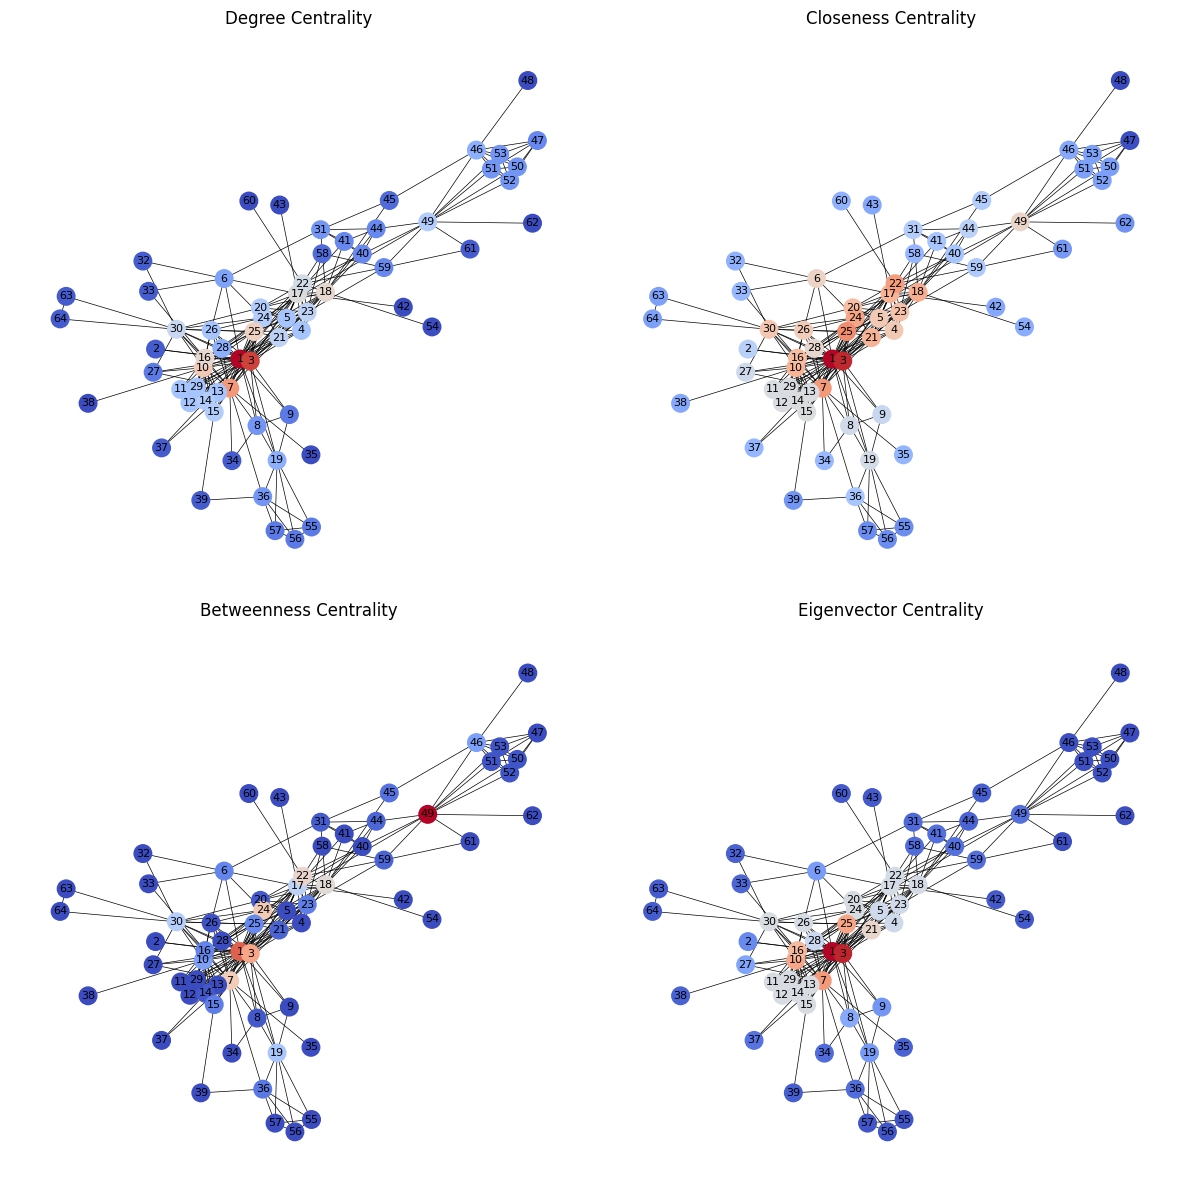

In [9]:
# scaling all node centralities for each centrality measure
DC_scaled = {node: value / max(DC.values()) for node, value in DC.items()}
CC_scaled = {node: value / max(CC.values()) for node, value in CC.items()}
BC_scaled = {node: value / max(BC.values()) for node, value in BC.items()}
EC_scaled = {node: value / max(EC.values()) for node, value in EC.items()}


# common options for all plots
options = {
    'node_size': 160,
    'width': 0.5,
    'with_labels': True,
    'font_size': 8,
    'cmap': plt.cm.coolwarm
}

# get a spring layout for all the plots
pos = nx.spring_layout(G, seed=2970)

# create figure with 4 subplots
plt.figure(figsize=(12, 12))

# plot degree centrality (DC)
plt.subplot(221)
options['node_color'] = list(DC_scaled.values())
nx.draw(G, pos, **options)
plt.title('Degree Centrality')

# plot closeness centrality (CC)
plt.subplot(222)
options['node_color'] = list(CC_scaled.values())
nx.draw(G, pos, **options)
plt.title('Closeness Centrality')

# plot betweenness centrality (BC)
plt.subplot(223)
options['node_color'] = list(BC_scaled.values())
nx.draw(G, pos, **options)
plt.title('Betweenness Centrality')

# plot eigenvector centrality (EC)
plt.subplot(224)
options['node_color'] = list(EC_scaled.values())
nx.draw(G, pos, **options)
plt.title('Eigenvector Centrality')

plt.tight_layout()
plt.show()


__d)__ After looking at these measures simultaneously, we look into how those measures differ from each other.
Use your node-wise similarities computed in a) to compute the correlation coefficient[<sup>1</sup>](#fn1) of all node-wise similarities between any two centrality measures. Store the correlation coefficients as variables `DC_CC`, `DC_BC`, `DC_EC`, `CC_BC`, `CC_EC` and `BC_EC` (e.g. store the correlation coefficient of the degree centrality (DC) and the closeness centrality (CC) in `DC_CC`). 

Which pair of centrality measures is the most/least correlated, and which measure is most/least correlated with all other centrality measures (average of pairwise correlations)? Argue why that is the case! **(3 pts)**  

<span id="fn1"><sup>1</sup>[Pearson product-moment correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (available in numpy)</span>

Pair with most correlation is CC,EC
Pair with least correlation is BC,EC
Most correlated measure is DC
Least correlated measure is BC


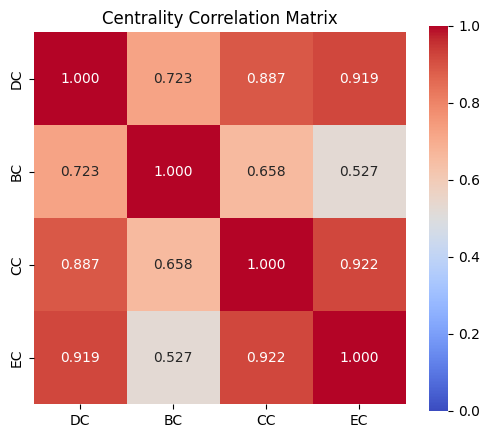

In [10]:
"""
Calculates the Pearson correlation coefficient between two centrality measures of the same graph.
Assumes each dictionary has nodes labeled from id 1 to N (number of nodes).

:param node_centralities1: Dictionary with node centralities.
:param node_centralities2: Dictionary with node centralities.
:return: Pearson correlation coefficient (float).
"""
def calculate_correlation_coefficient(node_centralities1, node_centralities2):
    centralities1 = [node_centralities1[n] for n in range(1, len(node_centralities1)+1)]
    centralities2 = [node_centralities2[n] for n in range(1, len(node_centralities2)+1)]
    return np.corrcoef(centralities1, centralities2)[0,1]

# get correlation coefficient pairs
DC_CC = calculate_correlation_coefficient(DC, CC)
DC_BC = calculate_correlation_coefficient(DC, BC)
DC_EC = calculate_correlation_coefficient(DC, EC)
CC_BC = calculate_correlation_coefficient(CC, BC)
CC_EC = calculate_correlation_coefficient(CC, EC)
BC_EC = calculate_correlation_coefficient(BC, EC)

# calculate average of pairwise correlations
DC_avg_corr = (DC_CC + DC_BC + DC_EC) / 3
CC_avg_corr = (DC_CC + CC_BC + CC_EC) / 3
BC_avg_corr = (DC_BC + CC_BC + BC_EC) / 3
EC_avg_corr = (DC_EC + CC_EC + BC_EC) / 3

correlation_coefficients = {
    "DC,CC": DC_CC,
    "DC,BC": DC_BC,
    "DC,EC": DC_EC,
    "CC,BC": CC_BC,
    "CC,EC": CC_EC,
    "BC,EC": BC_EC
}

avg_pairwise_correlations = {
    "DC": DC_avg_corr,
    "CC": CC_avg_corr,
    "BC": BC_avg_corr,
    "EC": EC_avg_corr
}

# get max and least correlated pairs
max_correlated_pair = max(correlation_coefficients, key=correlation_coefficients.get)
least_correlated_pair = min(correlation_coefficients, key=correlation_coefficients.get)

# get most and least correlated measures
most_correlated_measure =max(avg_pairwise_correlations, key=avg_pairwise_correlations.get)
least_correlated_measure =min(avg_pairwise_correlations, key=avg_pairwise_correlations.get)

print("Pair with most correlation is " + max_correlated_pair)
print("Pair with least correlation is " + least_correlated_pair)
print("Most correlated measure is " + most_correlated_measure)
print("Least correlated measure is " + least_correlated_measure)

# ---------------------------------------------------------
# create heatmap of correlation between centrality measures
cor_matrix = pd.DataFrame ([
    [1.0,         DC_BC,       DC_CC,       DC_EC],
    [DC_BC,       1.0,         CC_BC,       BC_EC],
    [DC_CC,       CC_BC,       1.0,         CC_EC],
    [DC_EC,       BC_EC,       CC_EC,       1.0]
],
columns=["DC", "BC", "CC", "EC"],
index=["DC", "BC", "CC", "EC"]
)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cor_matrix, 
    annot=True,
    fmt=".3f",
    cmap= plt.cm.coolwarm,
    vmin=0, vmax=1,
    square=True,
)

plt.title("Centrality Correlation Matrix")
plt.show()

__Answer:__ _Cell below_

## Correlation Analysis of Centrality Measures

### Most Correlated Pair: Closeness Centrality (CC) and Eigenvector Centrality (EC)
The most correlated pair in our network is closeness centrality (CC) and eigenvector centrality (EC). **Closeness centrality** indicates how quickly a node can reach every other reachable node in the network (closeness centrality is calculated as the sum of the inverse of the shortest path to each node) while **Eigenvector centrality** indicates how well connected is a node as it takes into account the number and "quality" of the node's connections (a node's centrality score is proportional to the sum of the scores of its neighbors).
The strong correlation between Closeness centrality and Eigenvector centrality indicates a strong relation between the quality of a node's connections and its global reachability (how quickly can a node reach all other reachable nodes).
In the context of a social network such as the Train Bombing Network, is understandable that a person that is very well connected (has a lot of connections to people that also have a lot of connections, we can suppose that in this context this might be the leader of the terrorist organization) can also very quickly reach all other people in the same network (including less important members of the organization).
Is also worth mentioning that the correlation between eigenvector centrality (EC) and degree centrality (DC) is very similar to the CC,EC correlation indicating that usually node's with more connections are also well connected.


### Least Correlated Pair: Eigenvector Centrality (EC) and Betweenness Centrality (BC)
The least correlated pair is eigenvector centrality (EC) and betweenness centrality (BC). **Betweenness centrality** indicates how often a node lies on the shortest path between two other nodes (nodes with high BC are important brokers or bridges in the network). The low correlation between EC and BC indicates that the broker role in the network is not often aligned with being connected to well-connected nodes, this means that a node might be very important for "inter-cluster" connectivity without having high influence.
It is also comprehensible that, in the case of this network, a member who connects different cells or departments of the organization is not necessarily an influential member (such as a leader or high-ranking member).

### Most Correlated Measure: Degree Centrality (DC)
Degree centrality is the most correlated measure, suggesting that the number of direct connections a node has is a strong indicator of its global importance in the network.
One key observation is that DC is most strongly correlated with betweenness centrality (BC), even though BC is overall less correlated with the other measures. This moderate DC–BC correlation is an important factor, especially considering that the correlations between BC–EC and BC–CC are much lower.


### Least Correlated Measure: Betweenness Centrality (BC)
Betweenness centrality is the least correlated measure, indicating that a node being an important broker in the network is not a strong indicator of its global importance.
In other words, a member of the terrorist network who acts as a bridge between different organization cells might not be very well connected in terms of number and quality of connections to other members (low correlation between BC-EC, and higher but still low correlation between BC-DC) and is also probably not very important for the speed of information flow within the organization (low correlation between BC-CC).

### Final Remarks
The findings in this task are similar to the conclusions of various studies\* that have examined the correlation between centrality measures in social networks. The social intricacies of the Train Bombing network therefore align with those observed in most other social structures. It would be interesting to extend this analysis by comparing these results to those from more organized networks, such as businesses or NGOs, and to less organized networks, like friend groups. This comparison might reveal the degree of organization in the terrorist network and the importance of hierarchy and influence.

\*Scientic papers consulted:
- Valente et al. (2008), "How correlated are network centrality measures?"
- Li et al. (2014), "Correlation between centrality metrics and their application to the opinion model."
- Kanyou, C., Kouokam, E., & Emvudu, Y. (2022). "Structural network analysis: Correlation between centrality measures."



### Task 3: Weak Ties (9 pts)

Having looked at the nodes of the network, we now consider the (weighted) edges of the network.

__a)__ Take a look at the distribution of edge weights. Which edge weights are present in the network, and how often does each edge weight occur? Plot these occurences using a histogram. **(2 pts)**

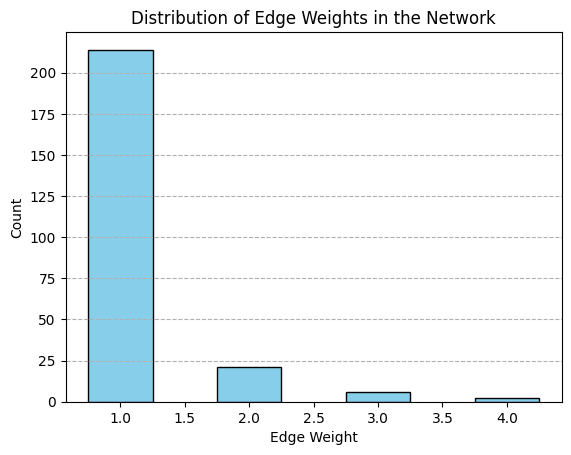

In [11]:
# Extract edge weights
edge_weights = [d['weight'] for _, _, d in G.edges(data=True)]

# Count occurrences of each weight
weight_counts = Counter(edge_weights)

weights, counts = zip(*sorted(weight_counts.items()))


plt.bar(weights, counts, width=0.5, color='skyblue', edgecolor='black')

plt.xlabel("Edge Weight")
plt.ylabel("Count")
plt.title("Distribution of Edge Weights in the Network")
plt.grid(axis="y", linestyle="--")

plt.show()

__b)__ Write a function that computes the neighborhood overlap score of a given edge, using the function signature which is specified in the cell below. Note that we want to return -1 if the edge does not exist in the network. For an edge between nodes $u$ and $v$, we do not count $u$ and $v$ in the union of neighbors in the denominator. **(4 pts)**

**Example:** _Let `H = nx.from_numpy_array(np.array([[0,1,1,1,0],[1,0,0,1,1],[1,0,0,1,0],[1,1,1,0,0],[0,1,0,0,0]]))` be an undirected NetworkX graph. Your implementation of `neighborhood_overlap` should return the same output as in the given examples below. Please note that correct output values do not necessarily mean that you have implemented the function correctly. Ideally, you should come up with your own data to test your function._

`neighborhood_overlap((0,1), H) == 0.3333333333333333`

`neighborhood_overlap((0,2), H) == 0.5`

`neighborhood_overlap((0,3), H) == 1.0`

`neighborhood_overlap((1,4), H) == 0.0`

In [12]:
# INPUT PARAMETERS
# 
# edge: pair of node IDs that represents the edge we want to compute the node overlap on.
# G: networkx graph whose nodes we want to check. You can assume that G is undirected, but weighted.
# 
# RETURN VALUE
# the node overlap of the given edge as a float

def neighborhood_overlap(edge, G):
    u, v = edge
    
    # check if edge not in graph
    if not G.has_edge(u, v): 
        return -1
    
    neighbors_u = set(G.neighbors(u)) - {v}
    neighbors_v = set(G.neighbors(v)) - {u}
    
    intersection = len(neighbors_u & neighbors_v)
    union = len(neighbors_u | neighbors_v)
    # else to prevent cases where union = 0 from yielding an error
    return intersection / union if union > 0 else 0.0 

__c)__ Apply your neighborhood overlap function on the network $G$, and save all edges which are local bridges as tuples into a list `lb`. The first two values of the tuple should be the nodes of an edge, while the third value should represent the weight of this edge. Save only edges that are truly local bridges, i.e., through which information from nodes other than the two adjacent nodes can flow. Again, plot the graph using a spring layout with the same orientation as in task 2, with all nodes being blue, and color all edges which are local bridges in red. **(4 pts)**

**Example:** _In the example below there are three local bridges in total. The first local bridge is an edge between the nodes 6 and 33 with an edge weight of 1:_

`lb = [('6', '33', 1.0), ('8', '39', 1.0), ('8', '48', 1.0)]`

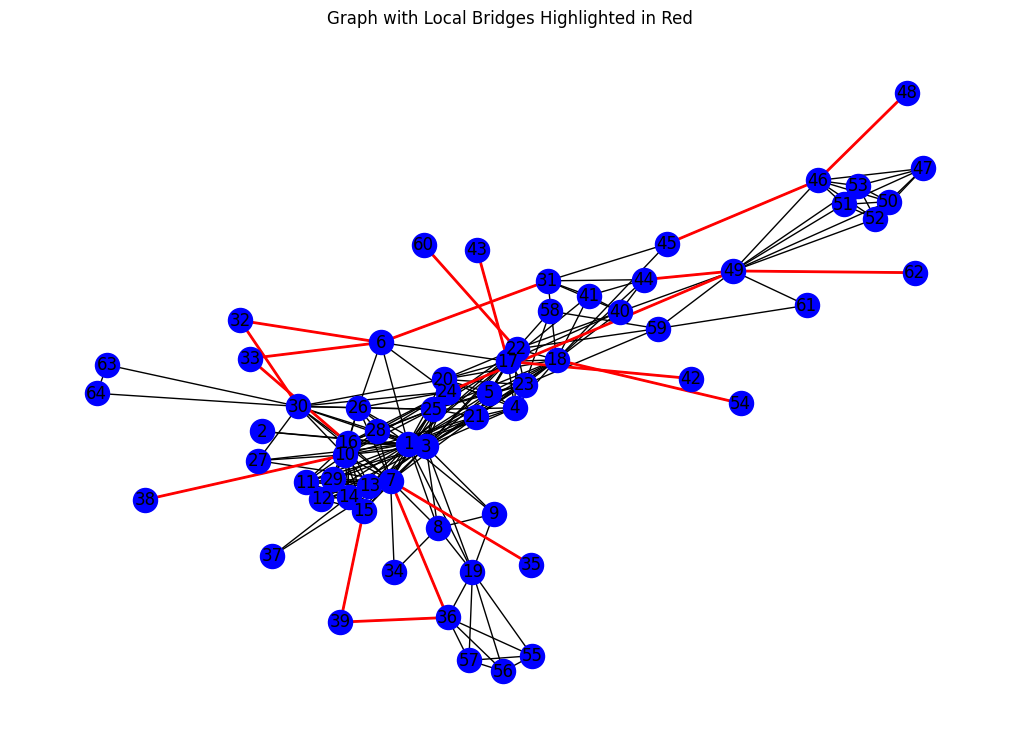

Local Bridges: [(6, 31, 1.0), (6, 32, 1.0), (6, 33, 1.0), (7, 35, 1.0), (7, 36, 1.0), (10, 38, 1.0), (15, 39, 1.0), (16, 33, 1.0), (17, 42, 1.0), (17, 43, 1.0), (18, 54, 1.0), (22, 60, 1.0), (24, 49, 1.0), (30, 32, 1.0), (36, 39, 1.0), (44, 49, 1.0), (45, 46, 1.0), (49, 62, 1.0), (46, 48, 1.0)]


In [13]:
lb = [
    (u, v, d['weight'])
    for u, v, d in G.edges(data=True)
    if neighborhood_overlap((u, v), G) == 0.0
]

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=2970) 

nx.draw(G, pos, node_color='blue', with_labels=True, edge_color='black', node_size=300)

nx.draw_networkx_edges(G, pos, edgelist=lb, edge_color='red', width=2) 


plt.title("Graph with Local Bridges Highlighted in Red")
plt.show()

# Output in a list
print("Local Bridges:", lb)